<a href="https://colab.research.google.com/github/gkanfer/AI-PS/blob/master/Byasian_paramter_addjust_dash_ipynb_Baysian_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import pymc3 as pm
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import tifffile as tfi
import skimage.measure as sme
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
# from PIL import fromarray
from numpy import asarray
from skimage import data, io
from skimage.filters import threshold_otsu, threshold_local
from skimage.morphology import convex_hull_image
from scipy import ndimage as ndi
from scipy.ndimage.morphology import binary_opening, binary_erosion
from skimage.morphology import disk, remove_small_objects
import skimage.morphology as sm
from skimage.segmentation import watershed
from skimage import data
from skimage.filters import rank, gaussian, sobel
from skimage.util import img_as_ubyte
from skimage import data, util
from skimage.measure import regionprops_table
from skimage.measure import perimeter
from skimage import measure
from skimage.exposure import rescale_intensity, histogram
from skimage.feature import peak_local_max
from pandas import DataFrame
from scipy.ndimage.morphology import binary_fill_holes
from skimage.viewer import ImageViewer
from skimage import img_as_float
import time
import base64
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Viewer requires Qt


In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [8]:
cd '/content/drive/MyDrive/Data/AIPS_dash/Bayesian_optemisation/output/box_grad'


/content/drive/MyDrive/Data/AIPS_dash/Bayesian_optemisation/output/box_grad


In [9]:
os.listdir()

['Emb1_t501-1.tifnew_.csv',
 'Emb2_t301-1.tifnew_.csv',
 'Emb1_t451-2.tifnew_.csv',
 'Emb1_t451-1.tifnew_.csv',
 'AS_09125_050116000001_L15f00d0_slice5_channel1.tifnew_.csv',
 'AS_09125_050116000001_L15f00d0_slice2_channel1.tifnew_.csv',
 'AS_09125_050116000001_L15f00d0_slice1_channel1.tifnew_.csv',
 'C1-Composite.tif10.tifnew_.csv',
 'T00001C04Z025.tifnew_.csv']

In [10]:
tables = glob.glob('*.csv')
print(tables)

['Emb1_t501-1.tifnew_.csv', 'Emb2_t301-1.tifnew_.csv', 'Emb1_t451-2.tifnew_.csv', 'Emb1_t451-1.tifnew_.csv', 'AS_09125_050116000001_L15f00d0_slice5_channel1.tifnew_.csv', 'AS_09125_050116000001_L15f00d0_slice2_channel1.tifnew_.csv', 'AS_09125_050116000001_L15f00d0_slice1_channel1.tifnew_.csv', 'C1-Composite.tif10.tifnew_.csv', 'T00001C04Z025.tifnew_.csv']


In [11]:

class rbind:
    def __init__(self,csv_file):
        self.csv_file = csv_file
    def load_table(self):
        if len(self.csv_file) > 1:
            newDF = pd.DataFrame()
            for csv in self.csv_file:
                temp = pd.read_csv(csv)
                newDF = pd.concat([newDF, temp])
            return newDF
        else:
            temp = pd.read_csv(self.csv_file)
            return temp
table_gen = rbind(csv_file=tables)
df = table_gen.load_table()
#colnames
print(df.columns.tolist())

['Unnamed: 0', 'image_name', 'object_num', 'block_size', 'offset']


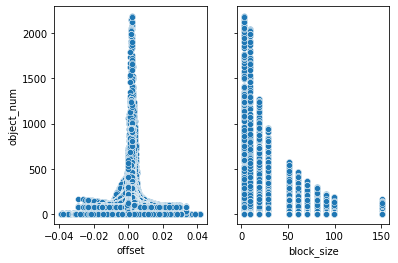

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.scatterplot(data=df, x="offset", y="object_num", ax=ax1)
sns.scatterplot(data=df, x="block_size", y="object_num", ax=ax2)

In [12]:
mean_x = np.mean(df['offset'])
print('mean offset {}'.format(mean_x))

sd_x = np.std(df['offset'])
print('sd offset {}'.format(sd_x))

mean offset 0.00025524309639343804
sd offset 0.010005800140397777


In [14]:
labels = df.loc[:,['object_num',]]
df_feature = df.loc[:,['object_num','block_size','offset']]
X_train, X_test, y_train, y_test = train_test_split(df_feature, labels,test_size = 0.25,
                                  random_state=42)

In [24]:
X_train = X_train[X_train['object_num']!=0]
X_train
# dict = {'x':[0,1,3,0,5],'y':[1,5,8,4,4]}
# test_df = pd.DataFrame(dict)
# test_df
# test_df = test_df[(test_df['x']!=0)]
# test_df

,object_num,block_size,offset
86128,1,91,0.021745
102412,10,151,-0.000419
105195,4,151,-0.008389
43329,1,51,0.007460
3712,105,29,-0.012124
...,...,...,...
39178,7,29,-0.006814
35838,11,29,-0.003634
21932,1,19,0.016043
36867,1,29,0.002898


In [25]:
formula = 'object_num ~ offset + block_size'
with pm.Model() as normal_model:
    # The prior for the data likelihood is a Normal Distribution
    family = pm.glm.families.Normal()

    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data=X_train, family=family)
     # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, block_size, offset, Intercept]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/hmc/quadpotential.py:224: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/hmc/quadpotential.py:203: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)


ValueError: ignored

In [26]:
from pymc3.glm import GLM
with pm.Model():
    GLM.from_formula('object_num ~ block_size + offset',X_train)
    trace = pm.sample()

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, offset, block_size, Intercept]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/hmc/quadpotential.py:224: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/hmc/quadpotential.py:203: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)


ValueError: ignored

In [ ]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.df_summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.df_summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

In [ ]:
plot_trace(normal_trace)

NameError: ignored